In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import comb

<h1>Math</h1>

We want to discuss the intuition behind the bayes classifier

we will do this for discrete and contineous variables

first contineous

Lets say we model the heigh of males in a class as a Gaussian

A gaussian has a bell shape curve and has 2 important parameters , mean $\mu$ and variance $\sigma^2$

The mean tells us the average value , the variance tells us how much our curve is spread , that is how skiiny or fat it is

The height of the bell curve gives us an idea of how likely that value is

our problem is , given the height of a student , tell whether the student is a male or a female , yet we only measured height of males , eventually we will also measure the heights of females this will be discussed later

Its always important to rememeber when dealing with contineous probability distributios that the height of the curve doesnot represent a porobability but a probability density 

f(x) is a PDF (probability density function) , for discrete variables we use PMF (probability mass function)

for example the PDF of a gaussian is :

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

we can see how if $\sigma^2$ is small enough we get a value greater than 1

Bayes classifiers (and Bayes rule) treats PDFs and PMFs the same way


Lets see we measure heights for men and for women , the we arrive at :

Men : $\mu$ = 177 cm, $\sigma$ = 10 cm

Women : $\mu$ = 165 cm, $\sigma$ = 9 cm

So now we have 2 bell curves one for men and one for women , now how can we use our 2 bell curves to help us with the classification problem




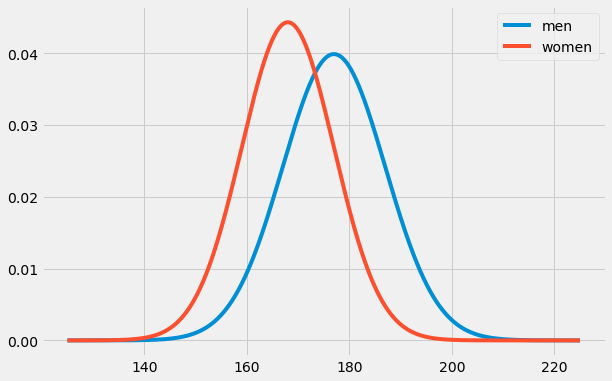

In [2]:
x = np.arange(125, 225, 0.001)
y1 = norm.pdf(x,177,10)
y2 = norm.pdf(x,168,9)
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x,y1,label='men')
ax.plot(x,y2,label='women')
plt.legend()
plt.show()


This graph shows what we have right now 2 bell curves

Lets say we have a person with height 160 cm , well we can clearly see that the PDF value for woman is higher than that of men , and thus we can pick the class with the maximum pdf , in this case women

But there is a problem , note how there is a huge overlap between men and women for certain heights

well , intuitevly we know that we can walk the street someday and see lots of women that are taller than the men we saw the same day , but that doesnot mean all women are taller than men

This is a problem , in fact probability is tricky , even if we get a higher PDF from women , for ex for heigh = 160 cm , may be should we walk in the street another day we will find much more men with heights 160 cm than women , this is why the overlapping part is problematic

luckily in the real world , we will have multiple features that allow us to make prediction (ex:weight,size of muscle , ...) , say we have another feature weight

Now we have a 2d Gaussian , which may be seperated by a line







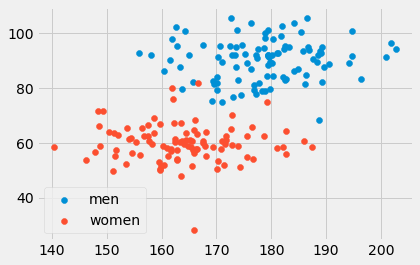

In [3]:
# just an example for visualisation

men = np.random.randn(100,2)
# men first dimension height mean 178 variance 10
men[:,0] = men[:,0]*10+178
# second dimesion weight mean 90 variance 8
men[:,1] = men[:,1]*8+90

women = np.random.randn(100,2)
# height of women mean 165 variance 9
women[:,0] = women[:,0]*9+165
# weight of women mean 60 variance 6 (i know it should be smaller :) 
women[:,1] = women[:,1]*6+60

plt.scatter(men[:,0],men[:,1],label='men')
plt.scatter(women[:,0],women[:,1],label='women')
plt.legend()
plt.show()

as we can see adding another dimension made both removed the overlap and now both classes are spereable using a line

Now the PDF for the multidimensional Gaussian is :

$$f(x) = \frac{1}{\sqrt{{(2\pi)}^D \vert \Sigma \vert}} e^{-\frac{1}{2} (x-\mu)^T \Sigma^{-1}(x-\mu)}$$

x is a feature vector of size D

$\mu$ is also of size D , so its the mean of each feature

$\Sigma$ the covariance matrix is of size DxD

if we use heights and weights , D = 2

as a reminder here is how to calculate $\mu$ and $\Sigma$

$$\mu = \frac{1}{N} \sum^{N}_{i=1}x_i$$

$$\Sigma = \frac{1}{N-1} \Sigma(x_i - \mu)(x_i - \mu)^T$$

in $\Sigma$ we divide by $\frac {1}{N-1}$ to get an unbiased estimate of the covariance  

in practice we can use libararies instead of writing all these complicated functions

Now lets try to translate our intuition into math

Our gaussians are called $p(x|y)$ , they are the probability distribution over input features given the label , so we say

$$p(x|y=man) = N(70,4^2)$$

$$p(x|y=woman) = N(65,3.5^2)$$

so what we are doing is calculating $p(x=65|y=man)$ , $p(x=65|y=woman)$ then taking highest value ,  but what would make more sense ?

its $p(y|x)$ what we are actually interested in the probability that y is some class given the input feature x

Now we can just use Bayes rule :

$$p(y|x) = \frac {p(x|y)p(y)} {p(x)}$$

p(y) = is just the probability y=man or y=women given no further information

To keep things simple , assuming we have equal number of men and women , $p(y=man) = p(y=woman) = 0.5 $

what about $p(x)$ , 

we know that the joint distribution $$p(x,y) = p(x|y)p(y)$$

this leads to the marginal distribution
$$ p(x) = \Sigma_y p(x,y)$$ 

so in our example , this gives :

$$ p(x) = p(x|y=woman)p(y=woman) + p(x|y=man)p(y=man) $$

lets take an example :

$p(x|y=man) = N(70,4^2)$

$p(x|y=woman) = N(65,3.5^2)$

$p(y=man) = 0.5 $

$x = 65 $

Now is x a man or a woman ?

we need to find p(y=man | 65) and p(y=woman|x=65)

$p(x=65 | y=woman) = 0.114$ , plug $\mu$ and $\sigma^2$

$p(x=65|y=man) = 0.0457$

$p(y=woman) = 0.5$

$p(y=man) = 0.5$

$p(x) = 0.114*0.5 + 0.0457*0.5 = 0.0799$

$p(y=woman|x=65)$

= $p(x=65|y=woman)p(y=woman)/p(x)$

= $(0.114*0.5)/0.0799 = 0.713$

$p(y=man|x=65)$

= $p(x=65|y=man)p(y=man)/p(x)$

= $(0.0457*0.5)/0.0799 = 0.286$

since $p(y=woman|x=65) > p(y=man|x=65)$ we predict woman

since the same denominator , $p(x)$ appears in both expressions it is not necessary to calculate , so we can say that our predicted class k is :

$k^* = argmax_k(p(x|y=k)p(y=k))$

we will revise the names of the rems again , for Bayes rule

$$ p(y|x) = \frac {p(x|y)p(y)} {p(x)} $$

we call :

$p(y|x)$ the posterior

$p(x|y)$ the likelihood

$p(y)$ the prior

$p(x)$ the evidence

Now we ask , is it really necessary to multiply the likelihood by the prior ? 

In our example it doesnot matter since $p(y=man) = p(y=woman) = 0.5 $ 

but imagine this scenario , we have a disease where $p(y=disease) = 0.01 , p(y=no \ disease) = p(0.99) $

now if we are told that our point lies in the middle but slightly close to disease , does it make sense to predict disease ?

well we have to remember that the disease is already rare in the first place and we may conclude that there is no disease

for example , say that someone is 125 kg , and we find that $p(x=125|y=disease) >  p(x=125|y=no \ disease) $ does this automatically mean he has a disease , well no

we need to remember that the disease is rare in the first place , may be he is just overweight

A final note is that we actually use the following to find k :

$$k^* = argmax_k(\log p(x|y=k) + log(y=k))$$

Real data may have very high dimensionality , D=1000 or larger

This leads to the curse of dimensionality which cuases probabilities to approach 0 (we multiply several probabilities each <= 1 , so number tends to approach 0)

if we use log instead we can end up adding log prob so we dont approach 0 , so instead of calculating AB , log(AB) = log(A) + log(B)

also + is faster than * , so calculating log pdf is faster than calculating pdf

since log is a monotonically increasing function both argmax rules produce the same result




<h1>Math</h1>

Now we reconsider the bayes classifier , this time we look at a discrete distribution rather than a guassian which is continuous

we will consider one common use of bayes classifier in natrual language processing , an instance of text classificatiin , spam detection

given an email we would like to identify whether or not is not spam

say that one of our features is how many times the word 'loan' appears in our email , intuitevly we might assume that 'loan' appears iften in span and rarely in non-spam

well a good distribution to model this is the binomial distribution , which is for counts of successes out of a total number of trials

In our case we can assume each word is a trial , and a success is that the word is loan

Discrete distributions are PMFs (probability mass function)

unlike PDFs , PMFs return an actual probability

The PMF for binomial distribution is as follows :

$$ f(k) = {n \choose k} \theta^k(1-\theta)^{n-k} $$

for ex , n = 100 , $\theta$ = 0.08 , "loan" appears 5 times , what is the probability of that occuring ?

plugging into the PMF , we get 0.09

$\theta$ is the probability of success for each individual trial

Again we need to distributions , one for spam and non-spam emails

Lets say $\theta$ = 0.08 for spam $\theta$ = 0.001 for not spam

This means in spam mails 'loan' appears 8 times in every 100 words , and in non-spam it appears 1 time in every 1000 words

so once again we have 2 distributions ,








In [4]:
# just an example
#seach each email has 100 words
n = 100
# spam
theta  = 0.08
# here are counts of 'loan' in each email
k = np.array(np.arange(0,100+1,1))
f_spam = comb(n,k)*theta**k*(1-theta)**(n-k)
# non spam
theta  = 0.001
# here are counts of 'loan' in each email
f_non_spam = comb(n,k)*theta**k*(1-theta)**(n-k)


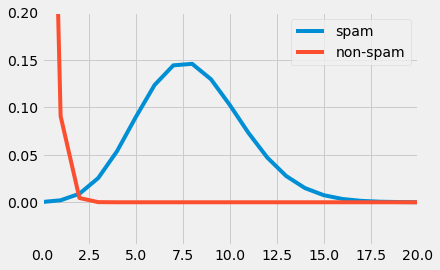

In [5]:
plt.plot(k,f_spam , label = 'spam')
plt.plot(k,f_non_spam , label = 'non-spam')
plt.ylim(top = 0.2)
plt.xlim(left=0,right = 20)
plt.legend()
plt.show()

The figure above shows the bernoulli distributions for both spam and not spam

Though it seems contienuous , it is not , we calculated values for which loan appeared 0 to 100 times and plotted a graph which connected the points

The word loan will not appear 2.5 times ,the probability of that is actually 0 , but as with the gaussain we can use these to make predictions

once again we must remember that we are interested in the posterior and not the prior , what we actually want is p(is it spam ? | the  email) , for this we use Bayes rule

$$p(y|x) = \frac {p(x|y)p(y)} {p(x)}$$

This is a better qustion than p(email|spam)

we know we can ignore p(x)

p(y) is just the proportion of spam/not spam emails , say p(y=spam) = 0.4 , p(y=not spam) = 0.6

lets take an example : say loan = 3 , spam or non-spam ?

In [6]:
print('p(loan = 3 | y = spam) = ',f_spam[3])
print('p(loan = 3 | y = non-spam) = ',f_non_spam[3])

p(loan = 3 | y = spam) =  0.025433096166375787
p(loan = 3 | y = non-spam) =  0.00014674468415343928


p(loan=3|y=spam)p(y=spam) = 0.0254 *0.4 = 0.0102

p(loan=3|y=non-spam)p(y=non-spam) = 0.000147 *0.6 = 8.8e-05

so we predict spam

In a more realistic scenario with more than one input feature , we use the multi-dimensional equivalent , the multinomial distribution

We can also do something simpler , that is model whether the word 'loan' appeared or not in an email

we can model this using a Bernoulli distribution

$$ f(k) = \theta^{1(k=1)}(1-\theta)^{1(k=0)}$$

lets take another example , given:

p(x=loan appears|y=spam) = 0.08
p(x=loan appears|y=non-spam) = 0.001
p(y=spam) = 0.4 , p(y=non-spam) = 0.6

for an input x = loan does not apeear , that an email where the word lone doesnot appear

p(y= spam | x = loan does not appear)
p(y= non-spam | x = loan does not appear)

Numerator for spam :
p(x=loan does not appear | y = spam)p(y=spam) = (1-0.08)*0.4 = 0.368

p(x=loan does not appear | y = non-spam)p(y=non-spam) = (1-0.001)*0.6 = 0.599

so perdict non-spam

remember since we use bernoulli distribution there are only 2 outcomes whose probability must sum up to 1

p(x=loan does not appear | y = spam) + p(appear | y = spam) = 1

thats why

p(x=loan does not appear | y = spam) = 1-0.08





<h1>Math</h1>

Now we will dicuss the naive bayes classifier

again we want to determine if an email is spam

we can look at words like 'free','money','loan',etc...

suppose we want to find :

p('money'|spam)

p('moeny'|non-spam)

Discrete probabilities are just counts

p('money'|spam) = count(spam messages contatinig 'money') / count(spam messages)

similar for p('money' | not spam)

so where does the naiveness come from ?

consider p('cash'|spam) , is it correlated to p('money'|spam) , well proabaly yes the are highly correlated

but naive bayes assumes independeance , so we assume all features are independant , this follows that p('cash','money'|spam) = p('cash'|spam)p('money'|spam)

Also p(all words|spam) = p(word1|spam)p(word2|spam) ....

Next we remember that what we actually want is p(spam|X) not p(X|spam)  , so we apply bayesian rule, this is what makes this Bayesian

p(spam|x) = p(x|spam)p(spam)/p(x)

p(npn-spam|x) = p(x|non-spam)p(non-spam)/p(x)

then predict whoever gives a greater value

so how do we model $P(X|C)$

P(document conataining 'free','money','cash',...|C) = p(free|C)p(money|C)p(cash|C)

since all probabilities are independant

P(X|C) = p(words|C)

$$P(words|C) = \prod_{w \in words \ in \ doc} P(w|C) \prod_{w \in words \ not \ in \ doc} (1-P(w|C))$$

we need to account to account for words that did not appear in doc , the probability of a word w that did not appear = (1-p(w|c))

vocabulary = words in doc U words not in doc

This seems like the oppsite of what we did with KNN, with KNN we try to approximate a function that takes in an input and produces output target , with naive bayes we assume all data is produced from target label , so all we need to do is model the distribution of the data given all target labels , later we discuss the difference between generative and discriminative models

<h1>Math</h1>

one more example before coding

assume any document has only 3 words for simplicity 'money','free','loan'


<table style="width:100%">
  <tr>
    <th>Money</th>
    <th>free</th>
    <th>loan</th>
    <th>spam</th>
  </tr>
  <tr>
    <td>1</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
  </tr>
<tr>
    <td>1</td>
    <td>0</td>
    <td>1</td>
    <td>1</td>
  </tr>
<tr>
    <td>0</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
  </tr>
<tr>
    <td>1</td>
    <td>1</td>
    <td>0</td>
    <td>1</td>
  </tr>
<tr>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
<tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
<tr>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
  </tr>
<tr>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
<tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>


</table>


supoose this is our training data , each row is reperesents a document , table[i,j] = 0 , if document i doesnot have word j and one otherwise , the last column tells us whether a mail is spam or not

now the following probabilities should cover the calculation for any document:

p(money|spam) = 3/5

p(~ money|spam) = 2/5

p(money|~spam) = 2/5

p(~ money|~spam) = 3/5

p(free|spam) = 4/5

p(~ free|spam) = 1/5

p(free|~spam) = 1/5

p(~ free|~spam) = 4/5

p(loans|spam) = 4/5

p(~ loans|spam) = 1/5

p(loans|~spam) = 0

p(loans|~spam) = 1

so now we receive a new document contains 'money' but not 'free' or 'loan'

We need to calculate the probability p(spam|money,~ free,~ loan) and p(~ spam|moeny,~ free,~ loan)

p(spam|money,~ free,~ loan) $\propto$ p(money,~ free , ~ loan|spam)p(spam) = (3/5)(1/5)(1/5)(1/2) = 0.012 

p(~ spam|money,~ free,~ loan) $\propto$ p(money,~ free , ~ loan|~ spam)p(~ spam) = (2/5)(4/5)(1)(1/2) = 0.16

so not spam

notice how p(~ spam) = p(spam) = 0.5 since we have equal number of span and non-span documents

also notice how as we have more features (as D gets higher) , we end up multiplying more prob <=1 , again this is why for a real-example we would have used log p

now what do we do with a prob = 0 ? since everyting is multipliead one 0 gets everything to 0

So we do add-one/laplace smoothing 

$$P(X_i|C) = \frac{count(X_i,C)+1}{count(C)+V}$$

we add to one in the numerator so we get no 0 values , we divide by V the vocabulary size to ensure we get valid probabilities that all some up to one

<h1>code</h1>

In [6]:
import numpy as np
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
import pandas as pd

In [7]:
class NaiveBayes:
    def fit(self,X,Y,smoothing=10e-3):
        labels = set(Y)
        priors = {}
        gaussians = {}
        for y in labels: # for each class we want to get parameters
            X_y = X[Y == y]
            mu = X_y.mean(axis=0)
            # in naive bayes we assume all features are independant
            # so all off-diagonals in covariance matrix are 0
            # so no need to store a DxD covariance matrix , just the diagonal (varainces) is enogh
            var =  X_y.var(axis=0) + smoothing # helps us avoid singular matrix by ensuring variances != 0
            priors[y] = len(X_y)/len(Y)
            params = {"mean":mu,"var":var}
            gaussians[y] = params
        self.gaussians = gaussians
        self.priors = priors
            
    def predict(self,X):
        N,D = X.shape
        probs = np.zeros( (N,len(self.gaussians)) ) # p(y|x)
        for y,params in self.gaussians.items():
            mu = params['mean']
            var = params['var']
            probs[:,y] = mvn.logpdf(X,mean=mu,cov=var) + np.log(self.priors[y])

        return np.argmax(probs,axis=1)
    
    def score(self,X,Y):
        preds = self.predict(X)
        return np.mean(preds==Y)
                    

In [8]:
# we will use the Naive Bayes on the MNIST dataset
# https://www.kaggle.com/oddrationale/mnist-in-csv

def get_mnist(limit=None): 
    df = pd.read_csv('datasets/MNIST/train.csv')
    data = df.to_numpy()
    np.random.shuffle(data)
    X = data[:,1:]/255.0
    Y = data[:,0]
    # data is too large , so training would take too much time
    # of course to little data is not good and leads to overfitting
    if limit is not None:
        X,Y = X[:limit] , Y[:limit]
    return X,Y

In [9]:
X,Y = get_mnist(10000)
Ntrain = len(Y)//2
Xtrain , Ytrain = X[:Ntrain],Y[:Ntrain]
Xtest , Ytest = X[Ntrain:],Y[Ntrain:]

In [10]:
model = NaiveBayes()

t0 = datetime.now()
model.fit(Xtrain,Ytrain)
print('Training time ',(datetime.now()-t0))

t0 = datetime.now()
print('Train accuracy ',model.score(Xtrain,Ytrain))
print('Time to compute train accuracy ',(datetime.now()-t0) , " Train size: ", len(Ytrain))

t0 = datetime.now()
print('Test accuracy ',model.score(Xtest,Ytest))
print('Time to compute test accuracy ',(datetime.now()-t0) , " Test size: ", len(Ytest))


Training time  0:00:00.068855
Train accuracy  0.8102
Time to compute train accuracy  0:00:02.846063  Train size:  5000
Test accuracy  0.8044
Time to compute test accuracy  0:00:02.830983  Test size:  5000


<h1>Math</h1>

now we discuss non-naive bayes

naive meant that all input features are independant

so we said that $p(X|C) = \prod_i(X_i|C)$

ok so how can we model p(X|C) ? well that an open-ended question , there are lots of ways 

one way is having a full covariance matrix instead of a diahonal covariance , this will give us a non-naive bayes

other options : Hidden Markov Model , Custom Bayes Net 

so we can mode P(X|C) however we want and it can be arbitarily complex

Now lets talk again about the Multivariate Gaussian with full covariance matrix and why this is not naive 

if 2 random variables are independant , their covariance = 0

so we say that : $X_i$ independant of $X_j$ $\to$ cov($X_i$,$X_j$) = 0

we can prove this using the definition of covariance

$$ cov(X_i,X_j) = E\left[(X_i-\mu_i)(X_j-\mu_j)\right]$$

$$ = E[X_iX_j] - E[X_i\mu_j] - E[\mu_iX_j] + E[\mu_i \mu_j]$$

$$= E[X_i]E[X_j] - E[X_i]\mu_j - \mu_i E[X_j] + \mu_i \mu_j$$

$$ = \mu_i\mu_j - \mu_i\mu_j - \mu_i \mu_j + \mu_i \mu_j$$

$$= 0 $$

as a revision the expected value formula is :

$$E(X) = \sum_{i=1}^{N} x_i p(x_i)$$

for any point $x_i , p(x_i) = \frac{1}{N}$ which is a constant independant of i , so we can take it out of summation and we yeild :

$$E(X) = \frac{1}{N} \sum_{i=1}^{N} x_i = \mu $$

and if we have 2 independant discrete random variables $X_1$ and $X_2$ we have :

$$E(X_1 X_2) = E(X_1)E(X_2)$$

Now if 2 variables have 0 covariance they are independant but the opposite is not necessarily true 

the only exception is a gaussian , if $X_i$ and $X_j$ are Gaussian-distributed and $cov(X_i,X_j) = 0$ then $X_i$ and $X_j$ are independant

The covariance matrix is hist the pairwise covariances of each $X_i$ and each $X_j$ where each equal 1XD , so $\Sigma(i,j) = cov(i,j) $ (off-diagonal for i != j)

this also means that each element on the diagonal is just the variance of the dimension so $\Sigma(i,i) = var(i)$ (along diagonal line $\Sigma(1,1) , \Sigma(2,2) , etc ...$)

Naive Bayes cov(i,j) = 0 , for i != j

Non-Naive Bayes cov(i,j) = anything

Now we we need to find the determinant and inverse of covariance matrix in determinant in the pdf (thankfully scipy will do the hard work so not much of a change in the code)

<h1>code</h1>

In [11]:
import numpy as np
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
import pandas as pd

In [12]:
class Bayes:
    def fit(self,X,Y,smoothing=10e-3):
        labels = set(Y)
        priors = {}
        gaussians = {}
        for y in labels: # for each class we want to get parameters
            X_y = X[Y == y ]
            mu = X_y.mean(axis=0)
            # same as Naive Bayes , this time with full covariance
            cov =  np.cov(X_y.T) + np.eye(X.shape[1])*smoothing # helps us avoid singular matrix by ensuring variances != 0
            priors[y] = len(X_y)/len(Y)
            params = {"mean":mu,"cov":cov}
            gaussians[y] = params
        self.gaussians = gaussians
        self.priors = priors
            
    def predict(self,X):
        N,D = X.shape
        probs = np.zeros( (N,len(self.gaussians)) ) # p(y|x)
        for y,params in self.gaussians.items():
            mu = params['mean']
            cov = params['cov']
            probs[:,y] = mvn.logpdf(X,mean=mu,cov=cov) + np.log(self.priors[y])

        return np.argmax(probs,axis=1)
    
    def score(self,X,Y):
        preds = self.predict(X)
        return np.mean(preds==Y)
                    

In [13]:
# we will use the Naive Bayes on the MNIST dataset
# https://www.kaggle.com/oddrationale/mnist-in-csv

def get_mnist(limit=None): 
    df = pd.read_csv('datasets/MNIST/train.csv')
    data = df.to_numpy()
    np.random.shuffle(data)
    X = data[:,1:]/255.0
    Y = data[:,0]
    # data is too large , so training would take too much time
    # of course to little data is not good and leads to overfitting
    if limit is not None:
        X,Y = X[:limit] , Y[:limit]
    return X,Y


In [14]:
X,Y = get_mnist(10000)
Ntrain = len(Y)//2
Xtrain , Ytrain = X[:Ntrain],Y[:Ntrain]
Xtest , Ytest = X[Ntrain:],Y[Ntrain:]

In [15]:
model = Bayes()

t0 = datetime.now()
model.fit(Xtrain,Ytrain)
print('Training time ',(datetime.now()-t0))

t0 = datetime.now()
print('Train accuracy ',model.score(Xtrain,Ytrain))
print('Time to compute train accuracy ',(datetime.now()-t0) , " Train size: ", len(Ytrain))

t0 = datetime.now()
print('Test accuracy ',model.score(Xtest,Ytest))
print('Time to compute test accuracy ',(datetime.now()-t0) , " Test size: ", len(Ytest))

Training time  0:00:00.201461
Train accuracy  0.998
Time to compute train accuracy  0:00:03.106716  Train size:  5000
Test accuracy  0.9338
Time to compute test accuracy  0:00:02.955729  Test size:  5000


In [16]:
# we get a much better result !!!

<h1>Math</h1>

now we will review LDA and QDA which we encountered in logistic regression , but this time with a Bayesian perspective

first we will make 2 assumptions :

1) Data for each class is gaussian distributed , the gaussian can be full covariance

2) we will only consider binary classification

call the classes '0' and '1'

Descision rule: 

$$p(C=1|X) > p(C=0|X) \to predict \ C = 1 $$

Replace with Bayes rule :

$$\frac {p(X|C=1)p(C=1)}{p(X)} > \frac {p(X|C=0)p(C=0)}{p(X)} $$

p(X) cancel out and we have :

$${p(X|C=1)p(C=1)} > {p(X|C=0)p(C=0)}$$

now we can plug in the expressions for each probability distribution , we get :

$$ \frac {1}{\sqrt {(2\pi)^D \vert \Sigma_1 \vert}}  \exp\left( - \frac {1}{2} (x-\mu_1)^T \Sigma_1^{-1} (x-\mu_1)\right)p(C_1) > \frac {1}{\sqrt {(2\pi)^D \vert \Sigma_0 \vert}}  \exp\left( - \frac {1}{2} (x-\mu_0)^T \Sigma_1^{-1} (x-\mu_0)\right)p(C_0)  $$

we replace $p(C_1) \ by \ \alpha$ and $p(C_0) \ by \ (1-\alpha) $

$$ \frac {1}{\sqrt {(2\pi)^D \vert \Sigma_1 \vert}}  \exp\left( - \frac {1}{2} (x-\mu_1)^T \Sigma_1^{-1} (x-\mu_1)\right) \alpha > \frac {1}{\sqrt {(2\pi)^D \vert \Sigma_0 \vert}}  \exp\left( - \frac {1}{2} (x-\mu_0)^T \Sigma_1^{-1} (x-\mu_0)\right)(1-\alpha)  $$

now we log both sides ,w e know this makes things easier and doesnot change the result sonce the log is a monotonically increasing function

we replaced the co-effecients of the gaussians by $K_1 and K_0$

$$K_1 -\frac{1}{2}(x-\mu_1)^T(x-\mu_1) + log \alpha > K_0 - \frac{1}{2} (x-\mu_0)^T \Sigma^{-1}(x-\mu_0) + log(1-\alpha)$$

move everyting to the left side so the right side is 0

$$K_1 -\frac{1}{2}(x-\mu_1)^T(x-\mu_1) + log \alpha - K_0 + \frac{1}{2} (x-\mu_0)^T \Sigma^{-1}(x-\mu_0) - log(1-\alpha) > 0$$

next we expand the multiplications :

$$K_1 - \frac{1}{2} (x^T \Sigma_1^{-1}x - \mu_1^T\Sigma_1^{-1}x - x^T\Sigma_1^{-1}\mu_1 + \mu_1^T\Sigma_1^{-1}\mu_1) + log\alpha - K_0 + \frac{1}{2} (x^T \Sigma_0^{-1}x - \mu_0^T\Sigma_0^{-1}x - x^T\Sigma_0^{-1}\mu_0 + \mu_0^T\Sigma_0^{-1}\mu_1) - log(1-\alpha) $$

one trick is that $$\mu_1^T \Sigma_1^{-1} x = x^T \Sigma_1^{-1} \mu_1$$

using this we simplify further and yeild :

$$K_1 - \frac{1}{2}x^T\Sigma_1^{-1}x + \mu_1^T \Sigma_1^{-1}x - \frac{1}{2}\mu_1^T \Sigma_1^{-1}\mu_1 + \log \alpha - K_0 + \frac{1}{2}x^T\Sigma_0^{-1}x - \mu_0^T \Sigma_0^{-1}x - \frac{1}{2}\mu_0^T \Sigma_0^{-1}\mu_0 - \log (1-\alpha)$$

now we combine by degree in X :

$$x^T \frac{1}{2}\left( \Sigma_0^{-1} - \Sigma_1^{-1}\right) x + \left(\mu_1^T \Sigma_1^{-1} - \mu_0^T \Sigma_0^{-1} \right)x - \frac{1}{2}\mu_1^T \ \Sigma_1^{-1} \mu_1 + \frac{1}{2} \mu_0^T \Sigma_0^{-1} \mu_0 + K_1 - K_0 + \log \alpha - log (1-\alpha) > 0$$

we have 3 parts 

one part is where x shows up twice , this is the quadratic term and hance Quadratic discriminative analysis QDA

then there is the part where x shows up once , this is what we call the linear term

then there is the part that doesnot depend on x we call that tje constant term

if expression on left > 0 choose class 1 , less than 0 chosoe class 0

In the Bayes we needed to calculate log pdf , this was expensive duto inverting , finding determinant of matrix and exponentiating

Much faster to do matrix multilpies (continue to see general form )

The general form of QDA is :

$$ x^TAx + w^T x + b > 0 $$

$$A = \frac {1}{2} \left(\Sigma_0^{-1} - \Sigma_1^{-1} \right)$$

$$w^T = \left( \mu_1 \Sigma_1^{-1} - \mu_0 \Sigma_0^{-1} \right)$$

$$b = -\frac{1}{2} \mu_1 \Sigma_1^{-1} \mu_1 + \frac{1}{2} \mu_0^T \Sigma_0^{-1} \mu_0 + K_1 - K_0 + log \ \alpha - log (1-\alpha)$$

if we put an extra ssumption , that is that both classes have the same covariance , the Quadratic term dissapears , and what remains is the linear and constant terms , and we yeild LDA (Linear discriminant analysis) 

<h1>Math</h1>

We will now discuss Generative vs Discriminative classifiers

whenever we have a probability , we predict based on p(C|X)

Classifiers like logistic regression model this directly (discriminative)

we start with X , get Y

For generative classifiers , like Naive Bayes , the main calculation is p(X|C)

we start with Y (the class) and model X

Think of them as data making machine which generates the data

Generative models are satisfying because they are rooted in rules of probability 

each variable is modeled explicitly , and we can change model of p(X|C) if results are poor

One advantahe if that we know exactly how each variable affects the result , a client may want to know each variables influence

One disadvantage is that historically , discrimanitive models have worked better 

yet discrimnative models are harder to explain , a linear combination of 2 variables could be physically meaningless